In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [69]:
data = pd.read_csv("Data.csv")
data = data.rename(columns={0 : "Sex", 1 : "Age", 2 : "Choice"})


<style>
td {
  font-size: 500px
}
</style>

# Введение
В данном исследовании изучался вопрос мнения населения Москвы о необходимости обязательного воинского призыва.
Соответствующий вопрос, который задавался респондентам: _"Поддержали бы вы отмену обязательного призыва?"_

##### Гипотеза была в том, что меньше четверти москвичей считают необходимым обязательный призыв.

### Выборка

Опрос проводился в центре Москвы, в окрестности станции метро Третьяковская, так что мы предполагаем, что выборка не репрезентует всё население Москвы. 
Всего было опрошено 412 москвичей, после чистки выборки осталось **244 женщины и 165 мужчин.**

**На графиках ниже представлено распределение по возрастам.**
>К сожалению, в первом опросе, составляющем около 40% выборки, мы не спрашивали точный возраст, так что существует небольшой перекос около возрастов, делящихся на 5


Средний возраст женщин: 29, средний возраст мужчин: 31


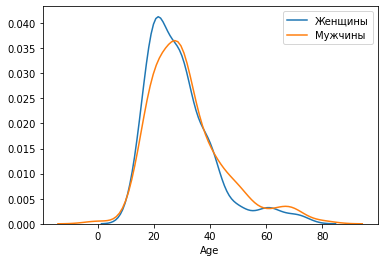

In [70]:
sns.distplot(data[data["Sex"] == "Female"]["Age"], hist=False, label="Женщины")
sns.distplot(data[data["Sex"] == "Male"]["Age"], hist=False, label="Мужчины")
Female_age_mean = data[data["Sex"] == "Female"]["Age"].mean()
Male_age_mean = data[data["Sex"] == "Male"]["Age"].mean()
print(f"Средний возраст женщин: {int(Female_age_mean)}, средний возраст мужчин: {int(Male_age_mean)}")

### Выборка
Как видно из графиков, мы чаще всего опрашивали женщин в возрасте около 20 ( _возможно это связано с тем, что опрос проводили три молодых парня, но это не точно_ ), людей старше 40 мы вообще почти не опрашивали, что, как мы считаем, связано с тем, что во время коронавируса группы риска предпочитают сидеть дома.

**Исходя из этого, было принято поделить выборку на 4 кластера: от 14 до 27, от 28 до 35, от 36 до 45 и старше 45.** Первый кластер такой большой, потому что нам кажется допустимым предположением, что более всего заинтересованы в отмене призыва люди призывного возраста.
>Тут мы подчистили выборку, потому что у некоторых людей из первого опроса мы не узнали возраст, а ещё есть сколько-то людей моложе 14, которых мы решили не считать

In [118]:
print(len(data))
data = data[data["Age"] >= 14]
print("Женщин:", len(data[data["Sex"] == "Female"]), "Мужчин:", len(data[data["Sex"] == "Male"]))
print(len(data[data["Age"] >= 45]) / (244 + 165))

409
Женщин: 244 Мужчин: 165
0.11735941320293398


In [82]:
def group(age):
    if age <= 27:
        return '<27'
    elif age <= 35:
        return '<35'
    elif age <= 45:
        return '<45'
    else:
        return '>45'
data['age_group'] = data['Age'].apply(group)

# Результаты


#### Нормировка  
К сожалению, наша изначальная гипотеза не подтвердилась. Если посмотреть на нормированные голоса, то мы получим, что **чуть больше половины считают, что призыв нужно оставить, чуть больше трети за реформу, а все остальные воздержались.** Достоверность этих данных не очень высока, потому что всего 10% опрошенных старше 45 лет, в то время как их вес в итоговой выборке очень большой. Данные о распределении по возрастам взяты с сайта http://www.statdata.ru/nasel_pol_vozr и мы очень надеемся, что там достоверная информация.

In [121]:
Choices = ["IDK", "YES", "NO"]
Age_Groups = ["<27", "<35", "<45", ">45"]
Sexes = ["Female", "Male"]
total_male_count = 54940
Weights = { "Male" : {"<27" : 10428.5, "<35" : 6270, '<45' : 10513, ">45" : 24711},
           "Female" : {"<27" : 10029, "<35" : 9189, '<45' : 1162, ">45" : 36036}}
total_Female_count = 66316
print('Age_group: ', end='')
for age_group in Age_Groups:
    print(age_group, end=' ')
print()
sum_yes = 0
sum_no  = 0
sum_idk = 0
for sex in Sexes:
    print("Sex = ", sex)
    for choice in Choices:
        print(f"choice: {choice} ", end='')
        if choice == "NO":
            print(' ', end='')
        for age_group in Age_Groups:
            percent = int(100 * len(data[(data['Choice'] == choice) & ((data['age_group'] == age_group) & (data["Sex"] == sex))]) / 
                          len(data[(data['age_group'] == age_group) & (data["Sex"] == sex)] )       )
            print(percent, end=' ')
            if choice == "YES":
                sum_yes += int(percent * Weights[sex][age_group])
            elif choice == "NO":
                sum_no += int(percent * Weights[sex][age_group])
            else:
                sum_idk += int(percent * Weights[sex][age_group])
        print()
    print()


Age_group: <27 <35 <45 >45 
Sex =  Female
choice: IDK 19 30 31 10 
choice: YES 48 24 25 25 
choice: NO  32 44 42 65 

Sex =  Male
choice: IDK 7 11 4 14 
choice: YES 70 51 44 19 
choice: NO  21 37 52 66 



In [123]:
print(f"Всего за да: {sum_yes}, всего за нет: {sum_no}, оставшихся: {sum_idk}")

Всего за да: 3613724, всего за нет: 5744978, оставшихся: 1392578


#### Другие результаты
На паре графиков ниже нарисовано сначала соотношение долей "за" к долям "против", а потом соотношение долей "безразлично" к "не безразлично"

Как видно из графиков, **чем моложе мужчина, тем меньше ему нравится идея обязательного призыва**, а вот для женщин всё чуть сложнее. Молодым женщинам либо всё равно на призыв, либо они против него, в промежутке от 28 до 45 им по большей части всё равно, а вот те, кто старше 45 делятся примерно одинаково на три группы. С другой стороны, доверительный интервал среди женщин в возрасте сравним с количеством их голосов, так что какую-либо закономерность достоверно установить невозможно.



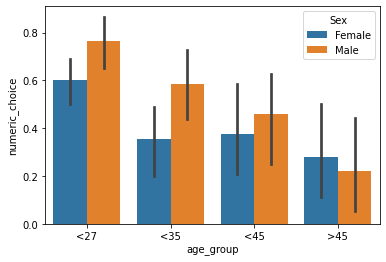

In [124]:
data['numeric_choice'] = data['Choice'].apply(lambda x: 1 if x == 'YES' else 0)
sns.barplot(x='age_group', y='numeric_choice', data=data[data['Choice']!='IDK'].sort_values('age_group'), hue='Sex')

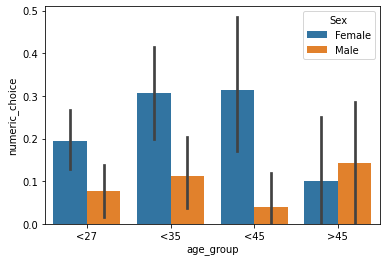

In [80]:
data['numeric_choice'] = data['Choice'].apply(lambda x: 1 if x == 'IDK' else 0)
sns.barplot(x='age_group', y='numeric_choice', data=data.sort_values('age_group'), hue='Sex')